In [1]:
import pandas as pd

In [26]:
import nltk
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

In [2]:
pdf = pd.read_excel('/content/drive/MyDrive/Copy_of_nlp_preprocessed_data.xlsx')

In [8]:
cdf = pd.read_excel('/content/drive/MyDrive/nlp_preprocessed_data.xlsx')

In [14]:
pdf.primaryTeam.value_counts()

ManCity      25845
Chelsea      15049
Liverpool    15022
Arsenal      13994
Tottenham     8736
Name: primaryTeam, dtype: int64

In [11]:
pdf = pdf[pdf.primaryTeam != 'Manchester United']

In [9]:
cdf[cdf.primaryTeam == 'Manchester United'].label.value_counts()

 1.0    317
-1.0    248
 0.0    176
Name: label, dtype: int64

In [16]:
mdf = cdf[cdf.primaryTeam == 'Manchester United']

In [17]:
pdf = pdf.append(mdf)

In [18]:
pdf[~pdf.label.isnull()].primaryTeam.value_counts()

Chelsea              1022
Tottenham            1014
ManCity              1000
Arsenal               900
Manchester United     741
Liverpool             531
Name: primaryTeam, dtype: int64

In [19]:
pdf[pdf.primaryTeam == 'Manchester United']['label'].value_counts()

 1.0    317
-1.0    248
 0.0    176
Name: label, dtype: int64

In [21]:
pdf = pdf[pdf["content"].str.contains(
    "live stream|live hd|stream|queenelizabeth|queen elizabeth|birthday|\
    follow back|follow me|giveaway|iphone14|designs|on sale|new video", 
    case=False)==False]

In [22]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def unlist(list):
    words=''
    for item in list:
        words+=item+' '
    return words

In [23]:
!pip install twython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [24]:
pdf.drop(columns = ['index'],inplace = True)

In [27]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [28]:
!!pip install contractions
import contractions
def expand_contractions(text):
  return contractions.fix(text)

In [29]:
import re
!pip install unidecode
import unidecode
def accented_characters_removal(text):
    # this is a docstring
    """
    The function will remove accented characters from the 
    text contained within the Dataset.
       
    arguments:
        input_text: "text" of type "String". 
                    
    return:
        value: "text" with removed accented characters.
        
    Example:
    Input : Málaga, àéêöhello
    Output : Malaga, aeeohello    
        
    """
    # Remove accented characters from text using unidecode.
    # Unidecode() - It takes unicode data & tries to represent it to ASCII characters. 
    text = unidecode.unidecode(text)
    return text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 31.5 MB/s 


In [30]:
import re
def preprocess_tweets(tweet):
  text = tweet.lower()
  text = re.sub("\B\#[A-z0-9_]+\\b", "", text)
  text=re.sub(r"(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w\.-]*)", "",text)
  # text=re.sub(r"\ [A-Za-z]*\.com", " ",text)
  text = re.sub("[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)", " ", text) #corrected regex
  text = re.sub("\B\@[A-z0-9_]+\\b", "", text)
  text=accented_characters_removal(text)
  text=expand_contractions(text)
  return text

In [31]:
cleantext=[]
i=0
for item in pdf['content']:
    if type(item)==float:
      item = str(item)
    words=preprocess_tweets(item)
    cleantext+=[words]
    i+=1
    if i%500==0:
      print(i)
pdf['vader_preprocessing_text'] = cleantext
pdf

500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000
53500
54000
54500
55000
55500
56000
56500
57000
57500
58000
58500
59000
59500
60000
60500
61000
61500
62000
62500
63000
63500
64000
64500
65000
65500
66000
66500
67000
67500
68000
68500
69000
69500
70000
70500
71000
71500
72000
72500
73000
73500
74000
74500
75000
75500
76000
76500
77000
77500
78000
78500
79000
79500
80000
80500
81000
81500
82000
82500
83000
83500
84000
84500
85000


,username,verified,followersCount,content,label,date,country,replyCount,retweetCount,likeCount,url,hashtags,primaryTeam,cleantext_no_spell,vader_preprocessing_text
17970,sverrehoem,False,2406,haaland - the new poster boy for an anti-democ...,-1.0,2022-09-03 17:32:20,Argentina,0,0,0,https://twitter.com/sverrehoem/status/15661169...,"['AbuDhabi', 'mancity', 'sportswashing']",ManCity,"['zealand', 'the', 'new', 'poster', 'boy', 'fo...",haaland - the new poster boy for an anti-democ...
17971,MichaelJacktooo,False,91,manchester city about to unleash the new dynam...,1.0,2022-07-21 00:06:20,United States,0,1,5,https://twitter.com/MichaelJacktooo/status/154...,"['ManCity', 'mci', 'ManchesterCity']",ManCity,"['manchester', 'city', 'about', 'to', 'unleash...",manchester city about to unleash the new dynam...
17972,pdl2203,False,483,#mcfc #mancity #motd knowing teams can use 5 s...,-1.0,2022-09-03 23:25:23,Argentina,0,2,1,https://twitter.com/pdl2203/status/15662057457...,"['MCFC', 'ManCity', 'MOTD', 'Foden', 'Grealish...",ManCity,"['know', 'team', 'can', 'use', '5', 'sub', 'fi...","knowing teams can use 5 subs, found it stra..."
17973,DaveDraws_,False,5029,big day for all #manchestercity fans yesterday...,1.0,2022-05-23 07:38:46,Argentina,1,0,4,https://twitter.com/DaveDraws_/status/15286415...,"['manchestercity', 'mcfc']",ManCity,"['big', 'day', 'for', 'all', 'fan', 'yesterday...",big day for all fans yesterday! if you fancy ...
17974,unc8689,False,493,3 goals in 5 and a half minutes is a helluva w...,1.0,2022-05-22 16:55:18,United States,0,0,0,https://twitter.com/unc8689/status/15284192399...,"['ManCity', 'Champions']",ManCity,"['3', 'goals', 'in', '5', 'and', 'a', 'half', ...",3 goals in 5 and a half minutes is a helluva w...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17797,13_blackmore,False,296,absolutely f#ck off! just seeing it talk shoul...,NaN,2022-09-03 18:42:00,Argentina,0,0,1,https://twitter.com/13_blackmore/status/156613...,"['ck', 'GlazersOut', 'GlazersSellManUtd', 'Gla...",Manchester United,"['absolutely', 'f', 'ck', 'off', 'just', 'see'...",absolutely f#ck off! just seeing it talk shoul...
17798,Thompson_Tips1,False,1400,congratulations to all winners yesterday. toda...,NaN,2022-09-03 12:40:57,Argentina,0,1,3,https://twitter.com/Thompson_Tips1/status/1566...,"['Buga', 'Arsenal', 'Auba', 'Zakaria', 'TheRin...",Manchester United,"['congratulations', 'to', 'all', 'winners', 'y...",congratulations to all winners yesterday. toda...
17799,liamhjournalism,False,86,half an hour to go until leicester city🦊 vs ma...,NaN,2022-09-01 18:30:00,South Africa,1,0,2,https://twitter.com/liamhjournalism/status/156...,"['LEIMUN', 'LCFC', 'MUFC', 'PL', 'Foxes', 'Uni...",Manchester United,"['half', 'an', 'hour', 'to', 'go', 'until', 'l...",half an hour to go until leicester city vs man...
17800,GeneiRyodan001,False,63,always a legend but ultimately fall short as a...,NaN,2021-11-22 01:42:33,India,0,0,0,https://twitter.com/GeneiRyodan001/status/1462...,"['OLE20LEGEND', 'ManUtd', 'AnotherReset']",Manchester United,"['always', 'a', 'legend', 'but', 'ultimately',...",always a legend but ultimately fall short as a...


# VADER Sentiment Analysis

In [33]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 35.4 MB/s 


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def compute_vader_scores_v2(df, label):
    sid = SentimentIntensityAnalyzer()
    df["vader_neg"] = df[label].apply(lambda x: sid.polarity_scores(x)["neg"])
    df["vader_neu"] = df[label].apply(lambda x: sid.polarity_scores(x)["neu"])
    df["vader_pos"] = df[label].apply(lambda x: sid.polarity_scores(x)["pos"])
    df["vader_comp"] = df[label].apply(lambda x: sid.polarity_scores(x)["compound"])
    # df['cleantext2'] = df[label].apply(lambda x: unlist(x))
    return df

In [35]:
df3 = compute_vader_scores_v2(pdf,'vader_preprocessing_text')

In [36]:
df3.reset_index(drop = True,inplace = True)

In [37]:
class0=[]
for i in range(len(df3)):
    if df3.loc[i,'vader_neg']>0:
        class0+=[-1]
    elif df3.loc[i,'vader_pos']>0:
        class0+=[1]        
    else:
        class0+=[0]   

In [38]:
df3['class']=class0
df3['class'].value_counts()

 1    34036
 0    31374
-1    30955
Name: class, dtype: int64

In [42]:
test = df3[df3.label.notnull()]

In [53]:
from sklearn import metrics
predicted= test['class']
accuracy_score=metrics.accuracy_score(predicted,test['label'].astype('int'))

In [54]:
precision = round(metrics.precision_score(test['label'].astype('int'),predicted, average="weighted"), 3)
recall = round(metrics.recall_score(test['label'].astype('int'),predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(test['label'].astype('int'), predicted, average="weighted"), 3)

In [55]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.46111004417130785
Precision:  0.469
Recall:  0.461
F1_score:  0.46


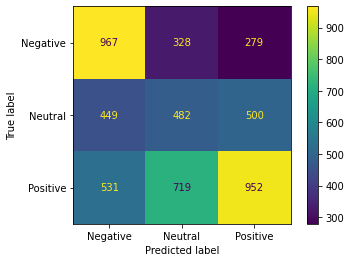

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test['label'].astype('int'), predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot()

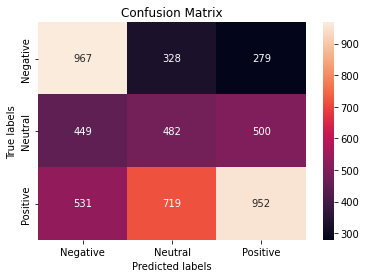

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral','Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral','Positive']);

# TextBlob Sentiment Analysis

In [60]:
from textblob import TextBlob

In [61]:
from pandas.core.algorithms import diff
from pandas._libs.algos import diff_2d
def sentiment_analysis(df):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df["TextBlob_Subjectivity"] =   df["vader_preprocessing_text"].apply(getSubjectivity)
 df["TextBlob_Polarity"] = df["vader_preprocessing_text"].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1
 df["TextBlob_Analysis"] = df["TextBlob_Polarity"].apply(getAnalysis )
 return df

In [62]:
newdf = sentiment_analysis(df3)

In [63]:
final_class=[]
for ind,i in newdf.iterrows():
  if not(pd.isnull(i['label'])):
    final_class.append(i['label'])
  else:
    final_class.append(i['class'])

newdf['final_class']=final_class

In [65]:
testdf = newdf[newdf['label'].notnull()]

In [72]:
from sklearn import metrics
predicted= testdf['TextBlob_Analysis']
accuracy_score=metrics.accuracy_score(predicted,testdf['label'].astype('int'))

In [73]:
precision = round(metrics.precision_score(testdf['label'].astype('int'),predicted, average="weighted"), 3)
recall = round(metrics.recall_score(testdf['label'].astype('int'),predicted, average="weighted"), 3)
nb_f1_score = round(metrics.f1_score(testdf['label'].astype('int'), predicted, average="weighted"), 3)

In [74]:
print("Accuracy: ", accuracy_score)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1_score: ", nb_f1_score)

Accuracy:  0.4422892260418667
Precision:  0.462
Recall:  0.442
F1_score:  0.446


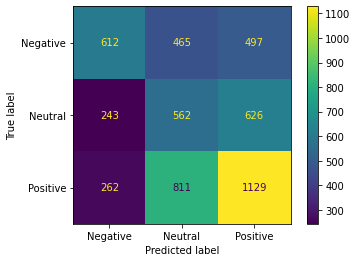

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(testdf['label'].astype('int'), predicted)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative','Neutral','Positive'])
cmd.plot()

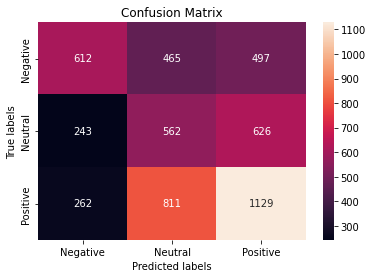

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Negative', 'Neutral','Positive']); ax.yaxis.set_ticklabels(['Negative', 'Neutral','Positive']);

In [77]:
newdf.to_excel('nlp_vader_textblob_classified_data_updated.xlsx',index = False)